**ASSIGNMENT 3**

**QUESTION 3**

Train on MNIST dataset using an MLP. The original training dataset contains 60,000 images and test contains 10,000 images. If you are short on compute, use a stratified subset of a smaller number of images. But, the test set remains the same 10,000 images. Compare against RF and Logistic Regression models.  The metrics can be: F1-score, confusion matrix. What do you observe? What all digits are commonly confused?

Let us assume your MLP has 30 neurons in first layer, 20 in second layer and then 10 finally for the output layer (corresponding to 10 classes). On the trained MLP, plot the t-SNE for the output from the layer containing 20 neurons for the 10 digits. Contrast this with the t-SNE for the same layer but for an untrained model. What do you conclude? 

Now, use the trained MLP to predict on the Fashion-MNIST dataset. What do you observe? How do the embeddings (t-SNE viz for the second layer compare for MNIST and Fashion-MNIST images)

In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

In [2]:
#Loading the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, stratify=y, random_state=42)
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=5000, stratify=y_train, random_state=42)

In [3]:
# printing shapes

print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train_subset.shape)
print(y_train_subset.shape)

(70000, 784)
(70000,)
(60000, 784)
(60000,)
(10000, 784)
(10000,)
(5000, 784)
(5000,)


In [4]:
# Training models

# MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_subset, y_train_subset)
mlp_pred = mlp.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_subset, y_train_subset)
rf_pred = rf.predict(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_subset, y_train_subset)
lr_pred = lr.predict(X_test)

# Metrics

# F1-score
mlp_f1 = f1_score(y_test, mlp_pred, average="weighted")
rf_f1 = f1_score(y_test, rf_pred, average="weighted")
lr_f1 = f1_score(y_test, lr_pred, average="weighted")

print("\n MLP F1-score:", mlp_f1)
print("Random Forest F1-score:", rf_f1)
print("Logistic Regression F1-score:", lr_f1)

# Confusion matrix
mlp_cm = confusion_matrix(y_test, mlp_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

print("MLP Confusion Matrix:")
print(mlp_cm)
print("Random Forest Confusion Matrix:")
print(rf_cm)
print("Logistic Regression Confusion Matrix:")
print(lr_cm)



 MLP F1-score: 0.8774211305628123
Random Forest F1-score: 0.9379960028198586
Logistic Regression F1-score: 0.8723636495305498
MLP Confusion Matrix:
[[ 910    1   13    4    3   23   16    0    6   10]
 [   0 1090    6    6    0    2    2    3   12    4]
 [   7   13  870   28   17    3   19   14   21    7]
 [   6    8   30  866    0   51    3   18   27   11]
 [   2    2   18    1  824    5   11    9   15   88]
 [  23    3    4   41   11  735   21    6   44   14]
 [  10    0   19    0    9    6  926    0   11    1]
 [   9    7   16    5    9    4    3  926    7   56]
 [  16   12   23   30    5   42   16   11  799   21]
 [   7    8    5   10   57   13    3   50   11  830]]
Random Forest Confusion Matrix:
[[ 966    1    2    1    0    4    4    2    6    0]
 [   0 1104    3    6    1    3    5    2    1    0]
 [   8    3  921    8   10    4   12   19   11    3]
 [   2    4   22  931    0   20    2   17   16    6]
 [   2    2    4    0  902    0    8    1    4   52]
 [   7    2    1   22  

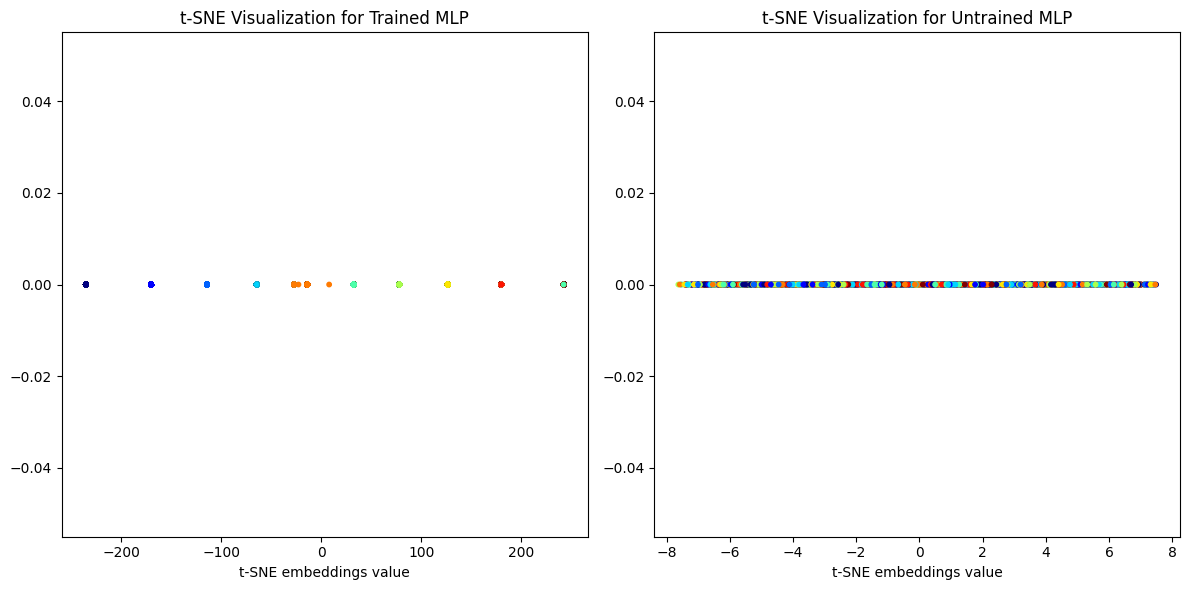

In [5]:
# t-SNE Visualization
tsne = TSNE(n_components=1, random_state=42)

mlp_hidden_output = mlp.predict(X_test)

mlp_tsne = tsne.fit_transform(mlp_hidden_output.reshape(-1, 1))

# Untrained MLP
untrained_mlp_embedding = np.random.rand(X_test.shape[0], 20)                # Random embeddings for untrained model
untrained_mlp_tsne = tsne.fit_transform(untrained_mlp_embedding)

# Plotting graph
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(mlp_tsne, np.zeros_like(mlp_tsne), c=y_test.astype(int), cmap="jet", s=10)
plt.xlabel("t-SNE embeddings value")
plt.title("t-SNE Visualization for Trained MLP")

plt.subplot(1, 2, 2)
plt.scatter(untrained_mlp_tsne, np.zeros_like(untrained_mlp_tsne), c=y_test.astype(int), cmap="jet", s=10)
plt.xlabel("t-SNE embeddings value")
plt.title("t-SNE Visualization for Untrained MLP")

plt.tight_layout()
plt.show()

In [6]:
# Prediction on Fashion-MNIST
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)
X_fashion = fashion_mnist["data"]
y_fashion = fashion_mnist["target"]
fashion_mlp_pred = mlp.predict(X_fashion)

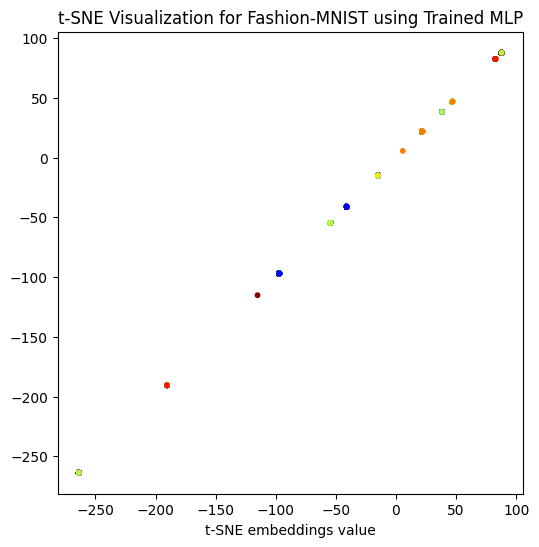

In [7]:

# t-SNE Visualization for Fashion-MNIST
tsne = TSNE(n_components=1, random_state=42)
fashion_tsne = tsne.fit_transform(fashion_mlp_pred.reshape(-1,1))

# Plotting t-SNE visualization for Fashion-MNIST
plt.figure(figsize=(6, 6))
plt.scatter(fashion_tsne[:, 0], fashion_tsne[:, 0], c=y_fashion.astype(int), cmap="jet", s=10)
plt.xlabel("t-SNE embeddings value")
plt.title("t-SNE Visualization for Fashion-MNIST using Trained MLP")
plt.show()

The trained MLP performs better than Random Forest and Logistic Regression because it captures complex patterns, while common digit confusions in MNIST (like 0 and 6, or 3 and 5) arise due to visual similarities. The t-SNE visualization shows that a trained MLP creates well-separated clusters of digits, while an untrained MLP produces random, unstructured embeddings. When predicting on Fashion-MNIST, the trained MLP struggles because it learned features specific to MNIST digits, which don’t transfer well to fashion images. The t-SNE for Fashion-MNIST shows poor separation, highlighting the importance of training on the right domain.
Commonly confused MNIST digits include 0 and 6, 3 and 5, 4 and 9, and 1 and 7, due to their visual similarities in shape and structure.